# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(loss='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

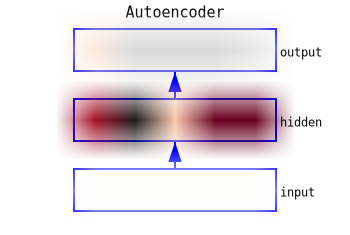

In [6]:
net

In [7]:
patterns = [one_hot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
dataset = [(p,p) for p in patterns]

In [10]:
net.set_dataset(dataset)

<IPython.core.display.Javascript object>

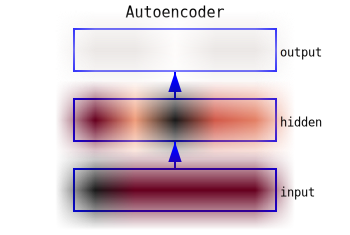

In [11]:
net

In [12]:
import time
for i in range(size):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [13]:
dataset[0]

([1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0])

In [14]:
net.set_dataset(dataset)

In [15]:
net.dataset.summary()

Input Summary:
   count  : 5
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5
   shape  : (5,)
   range  : (0.0, 1.0)


In [16]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.59256 | train accuracy 0.80000 | validate% 0.00000
Epoch #  400 | train error 0.41109 | train accuracy 0.92000 | validate% 0.00000
Epoch #  600 | train error 0.28987 | train accuracy 0.92000 | validate% 0.60000
Epoch #  800 | train error 0.21130 | train accuracy 0.92000 | validate% 0.60000
Epoch # 1000 | train error 0.15703 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1200 | train error 0.11885 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1400 | train error 0.08744 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1504 | train error 0.07253 | train accuracy 1.00000 | validate% 1.00000


In [17]:
net.propagate(dataset[0][0])

[0.9495492, 0.057530589, 0.011883726, 0.13683777, 0.00035875372]

<IPython.core.display.Javascript object>

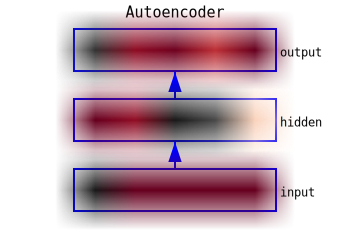

In [18]:
net

In [19]:
for i in range(size):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [20]:
net.test()

Testing on training dataset._..
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.0, 0.0, 0.0, 0.0, 0.0] | [1.0, 0.0, 0.0, 0.0, 0.0] | [0.9, 0.1, 0.0, 0.1, 0.0] | X
1 | [0.0, 1.0, 0.0, 0.0, 0.0] | [0.0, 1.0, 0.0, 0.0, 0.0] | [0.0, 0.9, 0.0, 0.0, 0.0] | correct
2 | [0.0, 0.0, 1.0, 0.0, 0.0] | [0.0, 0.0, 1.0, 0.0, 0.0] | [0.0, 0.0, 0.9, 0.1, 0.0] | X
3 | [0.0, 0.0, 0.0, 1.0, 0.0] | [0.0, 0.0, 0.0, 1.0, 0.0] | [0.1, 0.0, 0.0, 0.6, 0.1] | X
4 | [0.0, 0.0, 0.0, 0.0, 1.0] | [0.0, 0.0, 0.0, 0.0, 1.0] | [0.0, 0.0, 0.0, 0.3, 0.8] | X
Total count: 5
Total percentage correct: 0.2


## MNIST Autoencoding

In [21]:
from conx import Network, Layer, Dataset

In [22]:
dataset = Dataset.get_mnist()
dataset.summary()

Input Summary:
   count  : 70000
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000
   shape  : (10,)
   range  : (0.0, 1.0)


In [23]:
28 * 28

784

In [24]:
dataset.reshape_inputs(784)
dataset.set_targets_from_inputs()

In [25]:
dataset.summary()

Input Summary:
   count  : 70000
   shape  : (784,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000
   shape  : (784,)
   range  : (0.0, 1.0)


In [26]:
net = Network("MNIST-Autoencoder")

In [27]:
net.add(Layer("input", 784, vshape=(28, 28)))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", 784, vshape=(28, 28), activation="sigmoid"))

In [28]:
net.connect()
net.compile(loss="binary_crossentropy", optimizer="adam")

In [29]:
net.set_dataset(dataset)

In [30]:
net.dashboard()

<IPython.core.display.Javascript object>

In [31]:
import numpy as np

In [32]:
image = np.random.rand(784)

In [33]:
output = net.propagate(image)

In [34]:
dataset.slice(100)

In [35]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.23125 | train accuracy 0.79990 | validate% 0.00000
Epoch #  200 | train error 0.17152 | train accuracy 0.80607 | validate% 0.00000
Epoch #  300 | train error 0.13940 | train accuracy 0.81023 | validate% 0.00000
Epoch #  400 | train error 0.11935 | train accuracy 0.81315 | validate% 0.00000
Epoch #  500 | train error 0.10785 | train accuracy 0.81505 | validate% 0.02000
Epoch #  600 | train error 0.10018 | train accuracy 0.81621 | validate% 0.03000
Epoch #  700 | train error 0.09409 | train accuracy 0.81693 | validate% 0.05000
Epoch #  800 | train error 0.08904 | train accuracy 0.81761 | validate% 0.08000
Epoch #  900 | train error 0.08514 | train accuracy 0.81800 | validate% 0.12000
Epoch # 1000 | train error 0.08240 | train accuracy 0.81827 | validate% 0.17000
Epoch # 1000 | train error 0.08240 | train accuracy 0.81827 | validate% 0.17000


In [36]:
for i in range(20):
    net.propagate(dataset.inputs[i])